In [1]:
#installer et importer les bibliothèques pertinentes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# File path of the CSV file
file_path = r"C:\Users\ISSAM\Desktop\DataMining\creditcard.csv"

try:
    # Read the dataset from the CSV file into a DataFrame
    dataset = pd.read_csv(file_path)
    # Display the first few rows of the dataset
    print(dataset.head(5))
except Exception as e:
    # If an error occurs, print the error message
    print("Error occurred:", e)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
#preparation des données

#divide the data set into features (X) and target variable (y)
X = dataset.iloc[:,0:30].values
y = dataset.iloc[:,30].values

#Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
print(y)

[0 0 0 ... 0 0 0]


In [5]:
print(X)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02  2.53634674e+00
   1.37815522e+00 -3.38320770e-01  4.62387778e-01  2.39598554e-01
   9.86979013e-02  3.63786970e-01  9.07941720e-02 -5.51599533e-01
  -6.17800856e-01 -9.91389847e-01 -3.11169354e-01  1.46817697e+00
  -4.70400525e-01  2.07971242e-01  2.57905802e-02  4.03992960e-01
   2.51412098e-01 -1.83067779e-02  2.77837576e-01 -1.10473910e-01
   6.69280749e-02  1.28539358e-01 -1.89114844e-01  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01  1.66480113e-01
   4.48154078e-01  6.00176493e-02 -8.23608088e-02 -7.88029833e-02
   8.51016549e-02 -2.55425128e-01 -1.66974414e-01  1.61272666e+00
   1.06523531e+00  4.89095016e-01 -1.43772296e-01  6.35558093e-01
   4.63917041e-01 -1.14804663e-01 -1.83361270e-01 -1.45783041e-01
  -6.90831352e-02 -2.25775248e-01 -6.38671953e-01  1.01288021e-01
  -3.39846476e-01  1.67170404e-01  1.25894532e-01 -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.0

In [4]:
#imbalance in the data
fraud = dataset[dataset['Class'] == 1] 
valid = dataset[dataset['Class'] == 0] 

print('Fraud Cases: {}'.format(len(dataset[dataset['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(dataset[dataset['Class'] == 0]))) 

Fraud Cases: 492
Valid Transactions: 284315


In [8]:
fraud.Amount.describe() 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
#the amount details for normal transaction
valid.Amount.describe() 

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

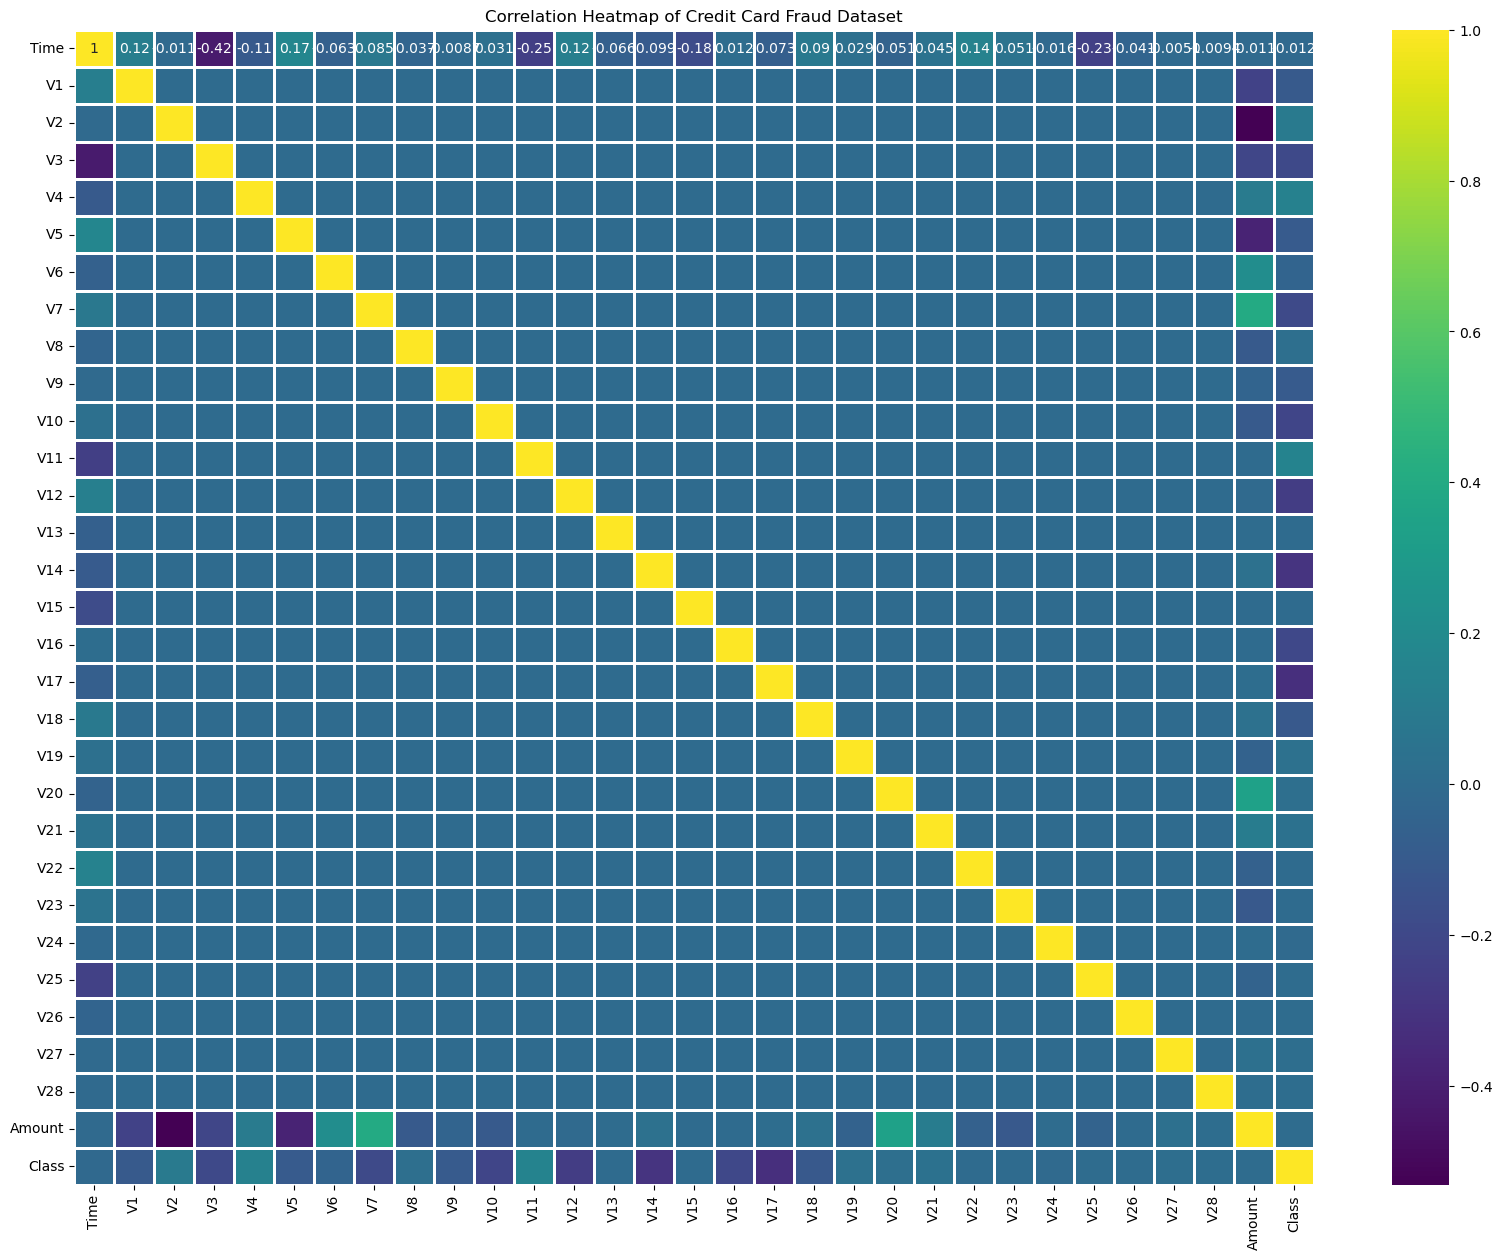

In [16]:

# Calculate the correlation matrix
correlation_matrix = dataset.iloc[:, :].corr()

# Set the figure size for the plot
plt.figure(figsize=(20, 15))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=1)

# Set the title of the plot
plt.title("Correlation Heatmap of Credit Card Fraud Dataset")

# Show the plot
plt.show()

In [6]:
#Diviser le jeu de données en deux parties

#Split the data set into training and testing sets

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=42)


In [7]:
#Implementer LDA

#Apply Linear Discriminant Analysis
lda=LinearDiscriminantAnalysis(n_components=1)
X_train=lda.fit_transform(X_train, y_train)
X_test=lda.transform(X_test)

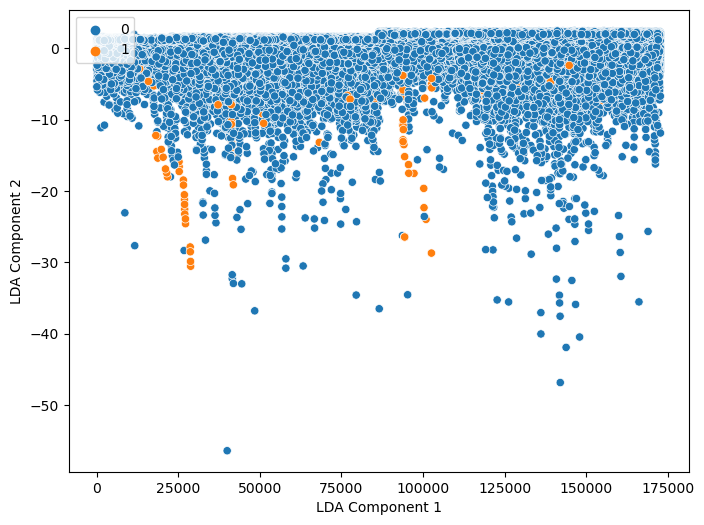

In [10]:
#visualiser les données

# Créer un DataFrame à partir des composantes LDA et des étiquettes de classe
tmp_df = pd.DataFrame(X_train, columns=['LDA Component {}'.format(i) for i in range(1, X_train.shape[1] + 1)])
tmp_df['Class'] = y_train

plt.figure(figsize=(8, 6))

# Tracer les données en utilisant Seaborn
sns.scatterplot(x='LDA Component 1',y='LDA Component 2', hue='Class', data=tmp_df)

# Ajouter une légende
plt.legend(loc='upper left')

# Afficher le graphique
plt.show()

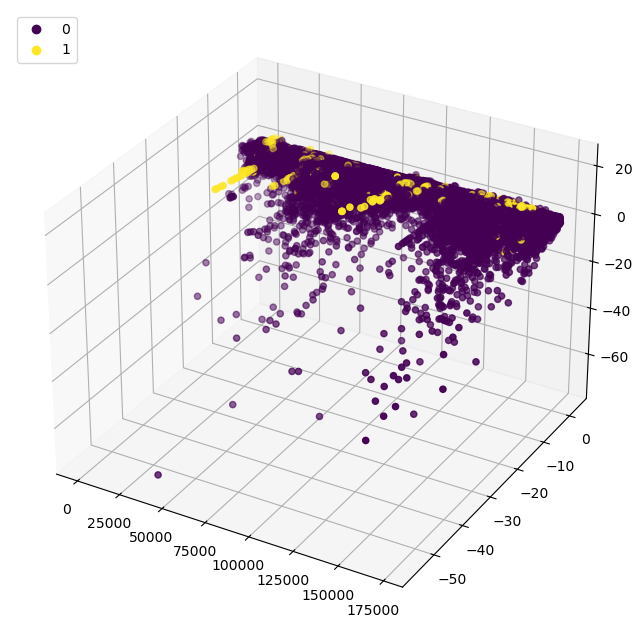

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Créer un DataFrame à partir des composantes LDA et des étiquettes de classe
tmp_df = pd.DataFrame(X_train, columns=['LDA Component {}'.format(i) for i in range(1, X_train.shape[1] + 1)])

# Ajouter les étiquettes de classe au DataFrame
tmp_df['Class'] = y_train

# Définir la figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les données en utilisant Seaborn
scatter = ax.scatter(tmp_df['LDA Component 1'], tmp_df['LDA Component 2'], tmp_df['LDA Component 3'], c=tmp_df['Class'], cmap='viridis')

# Ajouter une légende
plt.legend(*scatter.legend_elements(), loc='upper left')

# Afficher le graphique
plt.show()


In [8]:
#classifiez les données avec random forest

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy: 1.00


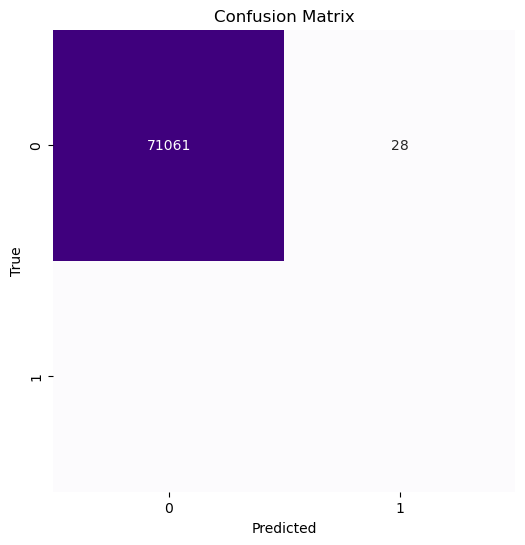

In [29]:
#Evaluer le modele LDA

#Assume 'y_test' and 'y_pred' are already defined
accuracy=accuracy_score(y_test, y_pred)
conf_m=confusion_matrix(y_test, y_pred)

#display the accuracy
print(f'accuracy: {accuracy:.2f}')

#display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Purples", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [36]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (y_pred != y_test).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  

The model used is Random Forest classifier
The accuracy is 0.9992696834358585
The precision is 0.7606837606837606
The recall is 0.7876106194690266
The F1-Score is 0.7739130434782607


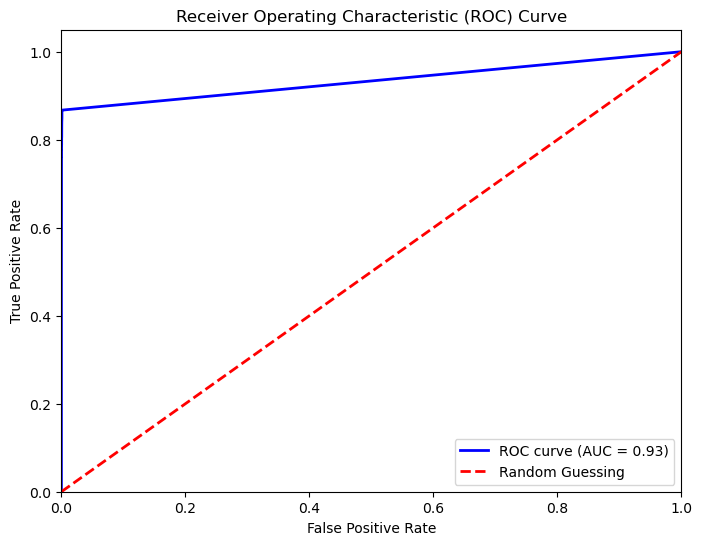

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Supposons que vous avez déjà entraîné votre modèle et que vous avez les prédictions sur les données de test
# Je vais utiliser un modèle fictif 'classifier' à titre d'exemple

# classifier est votre modèle formé
# X_test est votre ensemble de données de test
# y_test sont les vraies étiquettes de classe correspondant aux données de test

# Supposons que vous avez déjà défini votre modèle classifier et effectué les prédictions
y_score = classifier.predict_proba(X_test)[:,1]  # Obtenez les probabilités des classes positives

# Calculer le taux de faux positifs, le taux de vrais positifs et les seuils
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculer l'aire sous la courbe ROC (AUC-ROC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:
from keras.models import Sequential
from keras.layers import Dense
# Construire le modèle du réseau de neurones
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Évaluer les performances du modèle sur les données de test
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

C:\Users\ISSAM\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9986 - loss: 0.0226 - val_accuracy: 0.9996 - val_loss: 0.0029
Epoch 2/10
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9996 - val_loss: 0.0026
Epoch 3/10
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 4/10
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9996 - val_loss: 0.0024
Epoch 5/10
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 6/10
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9996 - val_loss: 0.0024
Epoch 7/10
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9996 - val_loss: 0.0023
Epoch 8/10
6008/6008 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9994 - loss: 0